##                            Telco Customer Churn Prediction:

Telco receives a lot of customers who subscribe to their service to get access to the fast communication access through mobile and internet services.

One of The biggest challenge a Telecom industry can Experiance when customers are leaving their services due to some Factors like Increase in monthly charges or Poor service or security etc.
The Main objective of this Project is to find the reasons behind the customers who are leaving the service. so that the company can target those customers with some affordable plans to retain those customers.



### Steps Performed

1. Imported all necessary libraries.
2. Import and analysed the dataset.
3. Checked Null values in the columns and filled with mean.
4. Converted a categorical column into integer.
5. Performed Univariate and Bivariate Analysis on the Dataset.
6. Checked the correlation between the independent variables
7. Converted all Categorical columns into Dummy variables.
8. Balanced the dataset using Smote technique
9. Split the data into Training and Validation set.
10. Performed Feature Scaling.
11. Applied some of the Machine learning Classification Algorithms to predict wheater a customer will churn(leave the service) or not.



___

### Importing Required Libraries

In [1]:
#importing the required libraries

import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix



### Loading the Dataset

In [2]:
# importing the dataset and storing it in data

data = pd.read_csv(r"C:\Users\hussa\Downloads\Churn Prediction dataset.csv")


### Inspecting the Dataset

In [3]:
# checking first 5 rows of our dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:

pd.set_option('display.max_columns',32)
pd.set_option('display.max_rows',50)


In [6]:
# checking summary of numerical columns

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# checking info of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#checking all columns in the dataset

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# checking the distinct values in each categorical columns

for col in data:
    if data[col].dtypes=='object':
        print(f'{col} : {data[col].unique()}')
    

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [10]:

data.replace('No internet service','No',inplace=True)

In [11]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [14]:
# checking no. of null values 

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# checking no.of duplicate columns

len(data[data.duplicated()])

0

In [16]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking Percentage of Churners and Non Churners

In [17]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

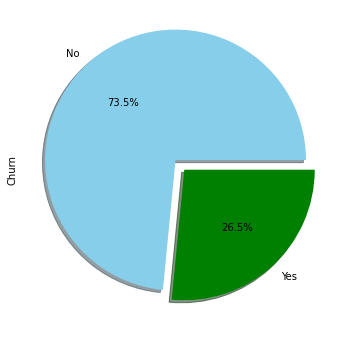

In [18]:
# percentage of churners and non churners

plt.figure(figsize=(8,6))
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%',explode=(0.1,0),colors= ('skyblue','green'),shadow=True)
plt.show()

##### We have 73% of custemers who are non churners and only 27% of customers who are going to churn. 

### Pie Chart of Customers having MultipleLines

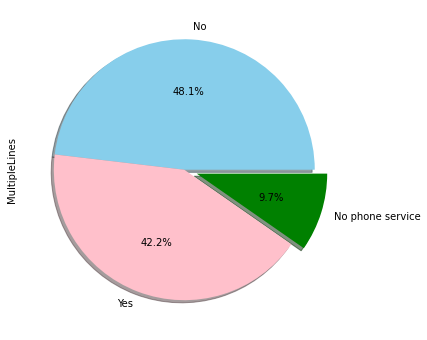

In [19]:

plt.figure(figsize=(8,6))
data['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%',explode=(0,0,0.1),colors= ('skyblue','pink','green'),shadow=True)
plt.show()

42% of Customers are having Multiple lines, they might be not fully satisfied by the service provided by the Telco company

In [20]:
# writing a function which plot countplot of each feature
def countplot_function(dataframe, column, figsize = (9,6), palette = "viridis"):
    plt.figure(figsize = figsize)
    sns.countplot(dataframe[column], palette = palette)
    plt.title("{} countplot".format(column), fontsize = 15)
    plt.xlabel("{}".format(column), fontsize = 10)

### Gender Countplot

### InternetService Countplot

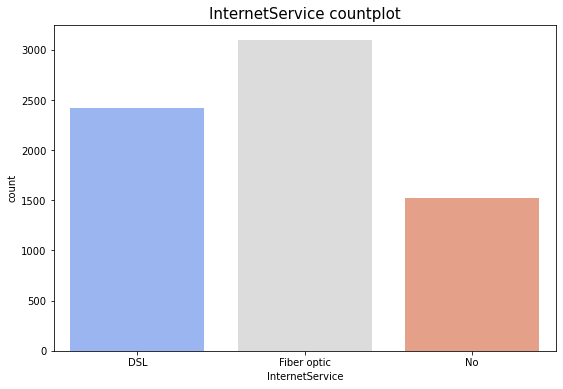

In [21]:
countplot_function(dataframe =data, column = "InternetService", palette = 'coolwarm')


### Contract Countplot

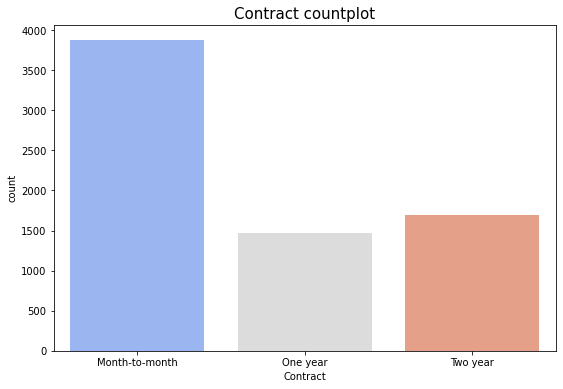

In [22]:
countplot_function(dataframe =data, column = "Contract", palette = 'coolwarm')


### Payment Method Countplot

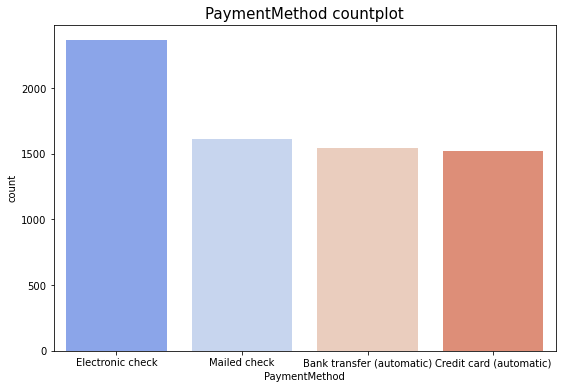

In [23]:
countplot_function(dataframe =data, column = "PaymentMethod", palette = 'coolwarm')


### Univariate and Bivariate Analysis

In [24]:
def uni(dataframe, col, figsize = (8,5), palette = "viridis"):
    
    plt.figure(figsize = figsize)

    sns.countplot(data=data,x=col,order=data[col].value_counts().index,hue='Churn',palette='viridis')
    plt.title("Churn Rate by {} ".format(col), fontsize = 15)

    plt.xlabel("{}".format(col), fontsize = 15)

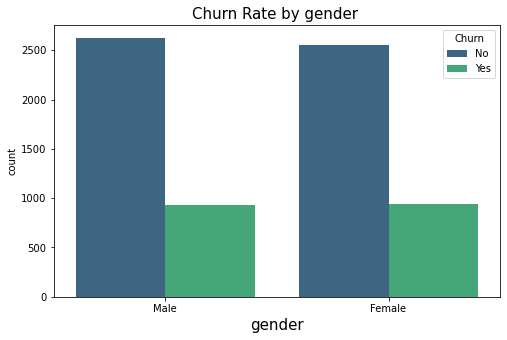

In [25]:
uni(dataframe=data,col='gender')

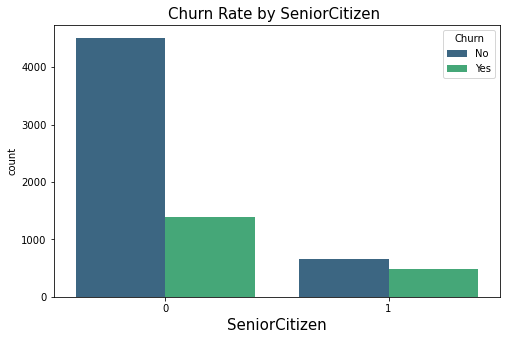

In [26]:
uni(dataframe=data,col='SeniorCitizen')

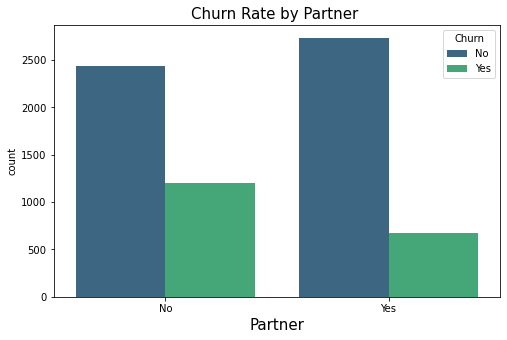

In [27]:
uni(dataframe=data,col='Partner')

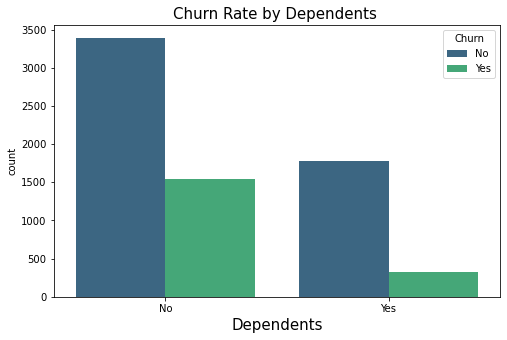

In [28]:
uni(dataframe=data,col='Dependents')

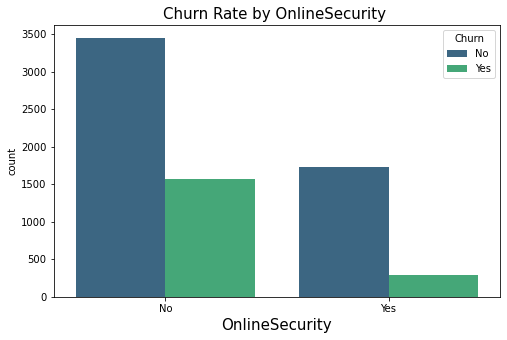

In [29]:
uni(dataframe=data,col='OnlineSecurity')

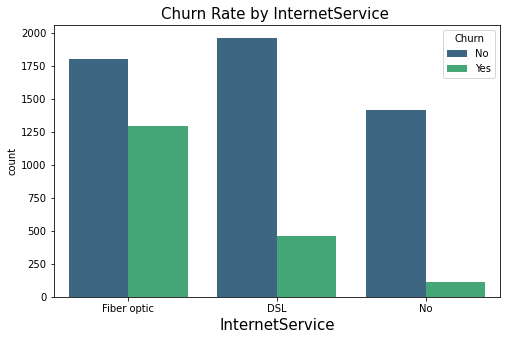

In [30]:
uni(dataframe=data,col='InternetService')

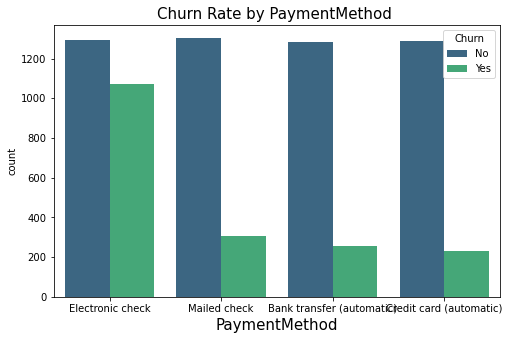

In [31]:
uni(dataframe=data,col='PaymentMethod')

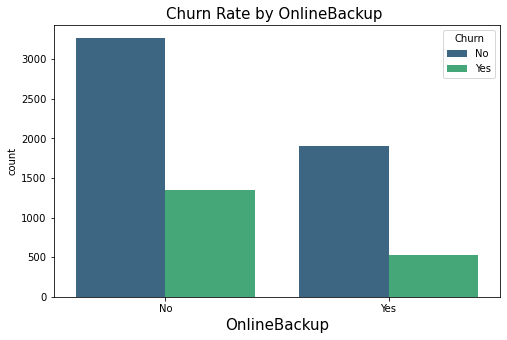

In [32]:
uni(dataframe=data,col='OnlineBackup')

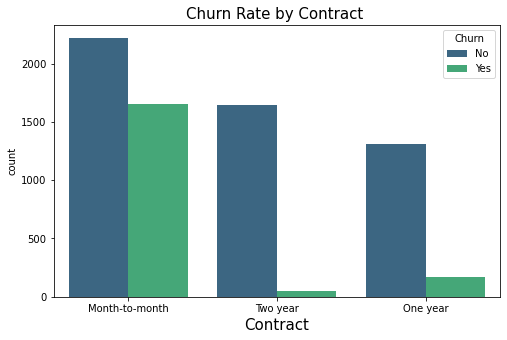

In [33]:
uni(dataframe=data,col='Contract')

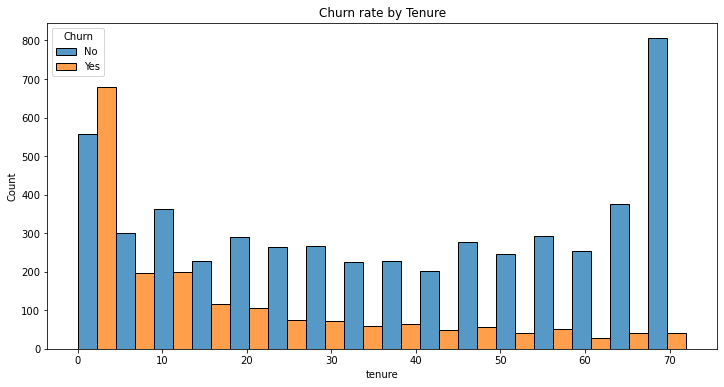

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(x='tenure',hue='Churn',data=data,multiple='dodge')
plt.title('Churn rate by Tenure')
plt.show()

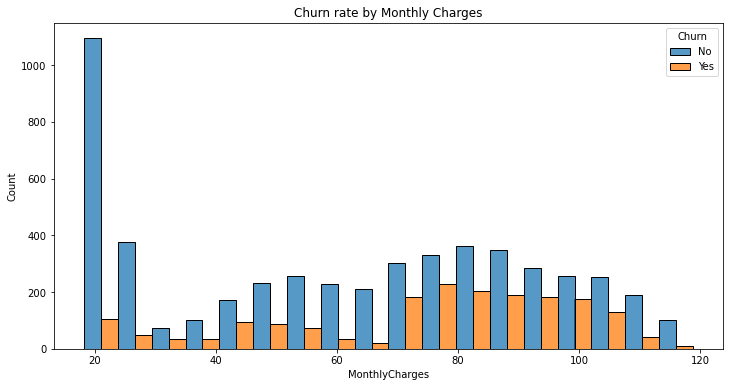

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(x='MonthlyCharges',hue='Churn',data=data,multiple='dodge')
plt.title('Churn rate by Monthly Charges')
plt.show()

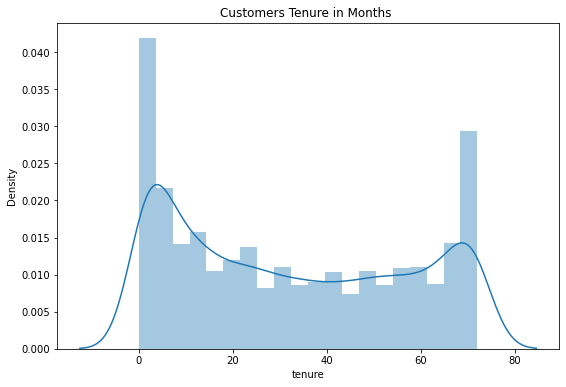

In [36]:
# distribution of customers based on tenure

plt.figure(figsize=(9,6))
sns.distplot(data.tenure,bins=20)
plt.title('Customers Tenure in Months ')
plt.show()

### Box Plot

In [37]:
def boxplot(dataframe, x, y, title_size = 15, label_size = 12, figsize = (10, 6), palette = "viridis"):
    plt.figure(figsize = (figsize))
    sns.boxplot(x = x, y = y, data = data, palette = palette)
    plt.xlabel("{} Value".format(x), fontsize = label_size)
    plt.ylabel("{} Value".format(y), fontsize = label_size)
    plt.title("{} Vs. {} Boxplot".format(x, y), fontsize = title_size)
    

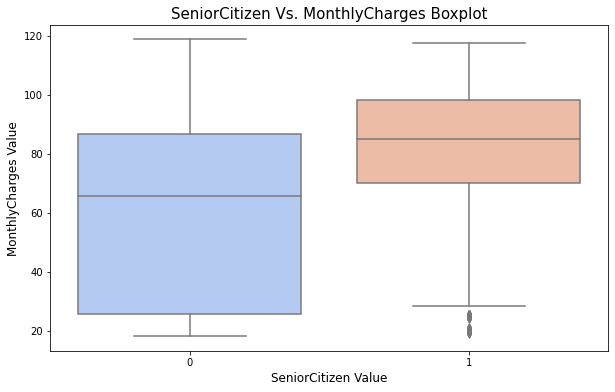

In [38]:
boxplot(dataframe = data, x = "SeniorCitizen", y = "MonthlyCharges", palette = "coolwarm")


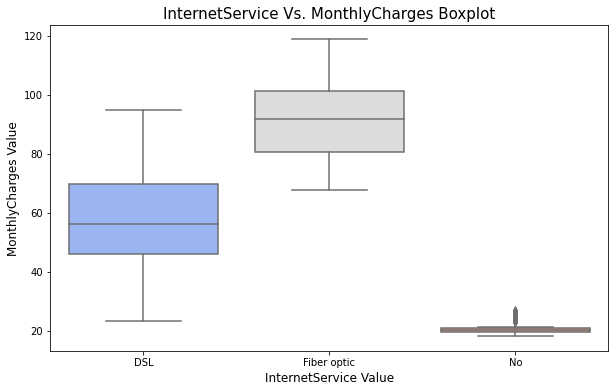

In [39]:
boxplot(dataframe = data, x = "InternetService", y = "MonthlyCharges", palette = "coolwarm")


Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.

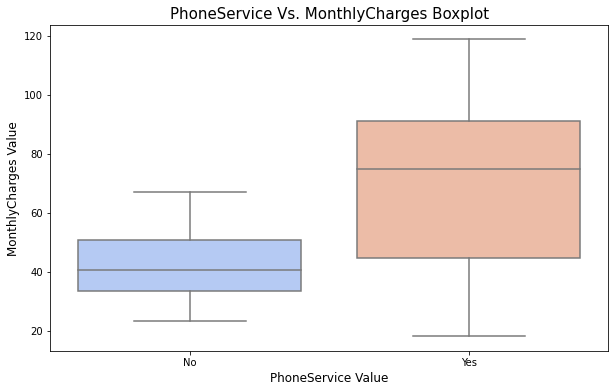

In [40]:

boxplot(dataframe = data, x = "PhoneService", y = "MonthlyCharges", palette = "coolwarm")


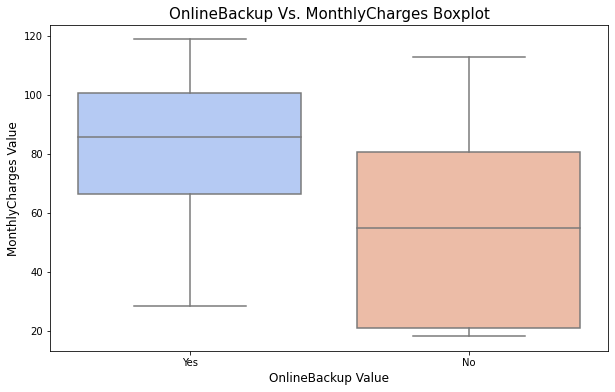

In [41]:
boxplot(dataframe = data, x = "OnlineBackup", y = "MonthlyCharges", palette = "coolwarm")


In [42]:
# taking a copy of data

data2 = data.copy()

### Removing irrelevant features

In [43]:
data2['Churn'] = np.where(data2.Churn=='Yes',1,0)
data2['gender'] = np.where(data2.gender=='Male',1,0)

In [44]:
data2[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
0,0.269209
1,0.261603


In [45]:
data2.groupby(['gender','Churn'])['gender'].count()

gender  Churn
0       0        2549
        1         939
1       0        2625
        1         930
Name: gender, dtype: int64

Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction to a model.

In [46]:
data2['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [47]:
data2['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Customers who don't have phoneservice is also present in MultipleLines column. so its better to remove Phoneservice column

In [48]:
data2[['MonthlyCharges','tenure','TotalCharges']].head(3)

,MonthlyCharges,tenure,TotalCharges
0,29.85,1,29.85
1,56.95,34,1889.5
2,53.85,2,108.15


Total Charges is the product of Monthly charges and Tenure. so i am removing total charges from our dataset

In [49]:
print(data2.groupby(['Churn','StreamingTV'])['Churn'].count())
print(data2.groupby(['Churn','StreamingMovies'])['Churn'].count())

Churn  StreamingTV
0      No             3281
       Yes            1893
1      No             1055
       Yes             814
Name: Churn, dtype: int64
Churn  StreamingMovies
0      No                 3260
       Yes                1914
1      No                 1051
       Yes                 818
Name: Churn, dtype: int64


StreamingTV and StreamingMovies features have same contribution to the dependent variable, so i am removing any one of them.

In [50]:
# dropping those columns

data2.drop(['gender','customerID','TotalCharges','PhoneService','StreamingMovies'],axis=1,inplace=True)


### Converting Categorical columns to Dummy variables

In [51]:
# converting all categorical columns into dummy variables
cols = ['Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod']
final_data = pd.get_dummies(data2,columns=cols,drop_first=True)
final_data.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,0,34,56.95,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,0,2,53.85,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
3,0,45,42.30,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0
4,0,2,70.70,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


### Splitting Data into Training and Testing set

We split the Data into Training set and Validation set and Build the Model based on the records in the training set and Check the model performance on the Validation set. This is usually done to test the performance of our model on the unseen data(i,e test data).

In [52]:
X = final_data.drop('Churn',axis=1)
y = final_data['Churn']

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Heatmap

Heatmap is a Good way to visualize our data, and helps to find the correlation between all set of features

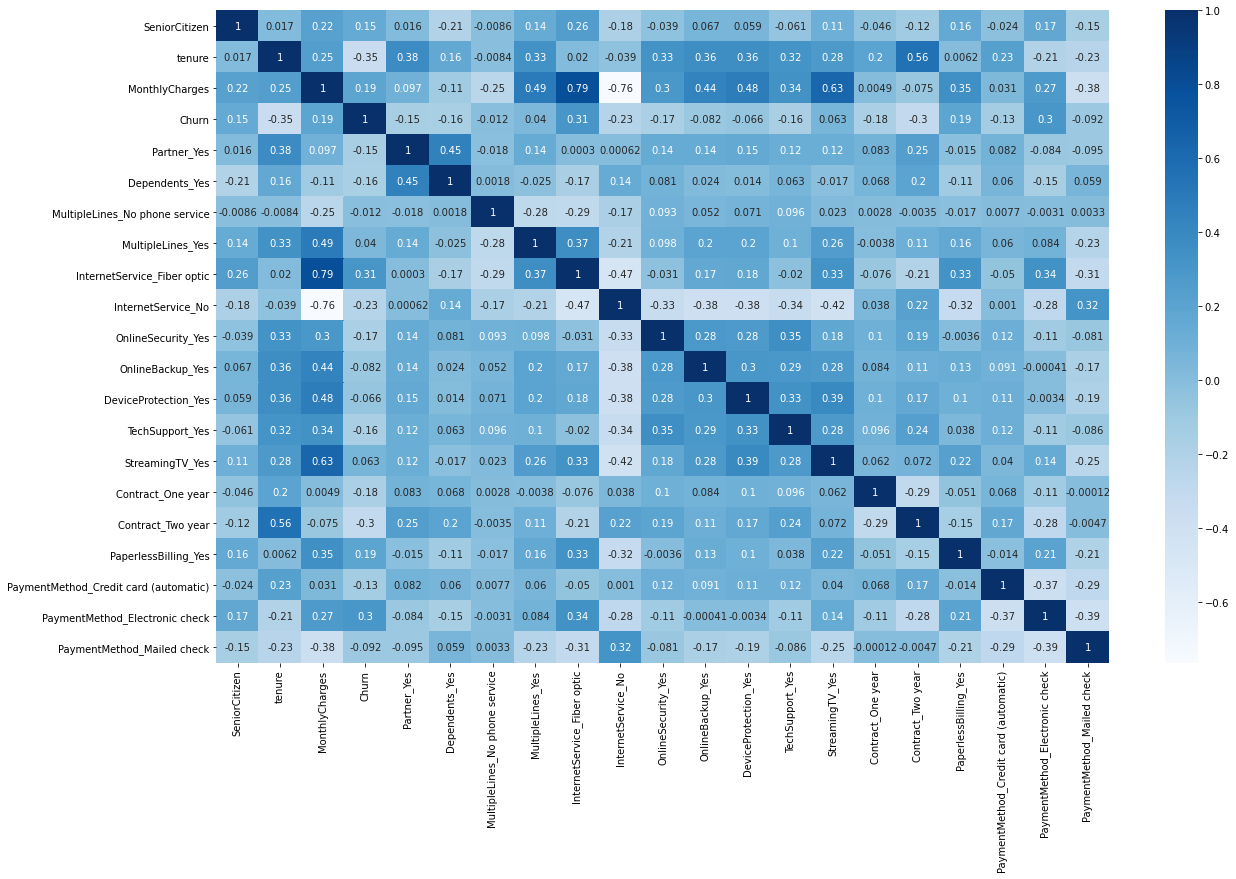

In [54]:
# heatmap to cheack the correlation between the variables

plt.figure(figsize=(20,12))
sns.heatmap(final_data.corr(),annot=True,cmap='Blues')
plt.show()

- From the above Heatmap it could be seen that there is a strong correlation between Tenure and Total Charges
- Monthly charges is negatively correlated with the customers who have not opted for internet service
- Monthly charges have strong correlation with Internet service Fibre optic

### Feature Scaling

Feature scaling will be prefered most of the times for its quick results and interpretability of the variables.
scaling will done when the scale between two features are high.


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [57]:
y_pred_lr = lr.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_lr)

0.7955997161107168

In [59]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.63      0.51      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=10,min_samples_split=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=50)

In [61]:
y_pred_rfc = rfc.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred_rfc)

0.7906316536550745

In [63]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1041
           1       0.64      0.46      0.53       368

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



### Support Vector Classifier

In [64]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',probability=True)
svc.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [65]:
y_pred_svc = svc.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred_svc)

0.7991483321504613

In [67]:
print(confusion_matrix(y_test,y_pred_svc))

[[934 107]
 [176 192]]


### Confusion Matrix

A confusion matrix would give us the values between the Actual and the Predicted outcomes

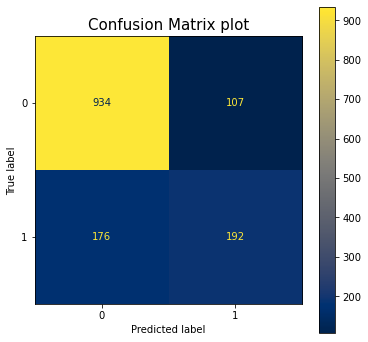

In [68]:
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(svc, X_test,y_test, ax = ax, cmap = 'cividis')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

###  ROC AUC Curve

We can also understand the performance of the model by taking into account the AUC (Area under the curve) and checking if the values is close to 1. The higher is the value of AUC, the better the model is said to be performing

AUC for our classifier is: 0.8177624984337802


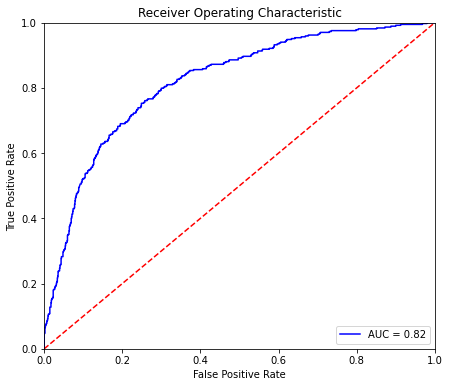

In [69]:

from sklearn.metrics import roc_curve, auc

class_probabilities = svc.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (7, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Insigths from EDA

- High Churn is seen in case of Month to Month contracts, Electroninc check as a payment method, No online security, No Tech Support and Fibre optics Internet service.
- Low Churn is seen in case of Long term contracts, Subscriptions without internet service.
- As the Monthly charges increases Customers are likely to churn more
- Most of the customers are either new or have stayed for a long time with the company
- There is a strong correlation between Tenure and Total Charges
- Monthly charges is negatively correlated with the customers who have not opted for internet service
- Monthly charges have strong correlation with Internet service Fibre optic

### Model Performance

1. It could be seen based on the results that our model are performing good with a accuracy of 80%


2. Therefore, the model would be able to predict whether a customer is going to churn (leave the service) or not with an accuracy of about 80% which is not bad for a model that contains imbalanced data along with less number of samples.


---

In [70]:
import pickle 
pickle.dump(svc,open('model.pkl','wb'))